In [10]:
###PYTHON NOTEBOOK FOR VISUALIZATION OF FIGURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from sklearn.metrics import r2_score
#from scipy.stats import linregress
import colormaps as cmaps
import os
#from sklearn.decomposition import PCA 
from statistics import median_low


In [4]:
# #RANDOM SAMPLING FOR W SWEEP
# from scipy.stats import qmc
# import pandas as pd
# sampler = qmc.LatinHypercube(d=4)
# sample = sampler.random(n=10000)
# l_bounds = [10E-8, 10E-7, 10E-6, 10E-5]

# u_bounds = [10E-6, 10E-5, 10E-5, 10E-4]

# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# d = pd.DataFrame({'k1':sample_scaled[:,0], 'k2':sample_scaled[:,1], 'k3':sample_scaled[:,2] ,'k4':sample_scaled[:,3]})
# d.to_csv('exp_data/lhc.csv')

In [2]:
# #RANDOM SAMPLING FOR W SWEEP - UPSTREAM REPRESSION
# from scipy.stats import qmc
# import pandas as pd
# sampler = qmc.LatinHypercube(d=5)
# sample = sampler.random(n=10000)
# l_bounds = [10E-8, 10E-7, 10E-7, 10E-6, 10E-5]

# u_bounds = [10E-6, 10., 10E-5, 10E-5, 10E-4]

# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# d = pd.DataFrame({'k1':sample_scaled[:,0], 'theta1':sample_scaled[:,1], 'k2':sample_scaled[:,2], 'k3':sample_scaled[:,3] ,'k4':sample_scaled[:,4]})
# d.to_csv('exp_data/lhc_ur.csv')

### Sample B-Car results

In [21]:
fba_data = pd.read_csv("F:/burden/beta_carotene/nc/fba_data_nc_total.csv")
ode_data = pd.read_csv("F:/burden/beta_carotene/nc/ode_data_nc_total.csv")
sum_data = pd.read_csv("F:/burden/beta_carotene/nc/sum_data_nc_total.csv")
sum_data["objective"] = sum_data.burden/sum_data.bcar_tot
print('N = ', len(sum_data))

N =  1005


In [22]:
w = fba_data.W.unique()[0]
fba = fba_data.loc[fba_data.W == w]
ode = ode_data.loc[ode_data.W == w]

(array([ 92.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
 array([ 3123. , 11450.8, 19778.6, 28106.4, 36434.2, 44762. , 53089.8,
        61417.6, 69745.4, 78073.2, 86401. ]),
 <BarContainer object of 10 artists>)

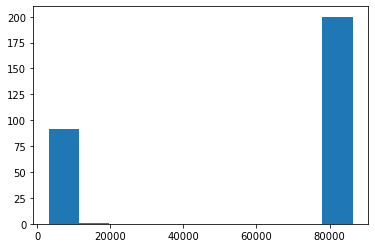

In [67]:
#VERY SLOW - find better way
# w_len = []
# for w in fba_data.W.unique():
#     fba = fba_data.loc[fba_data.W == w]
#     w_len.append(len(fba))
plt.hist(w_len)

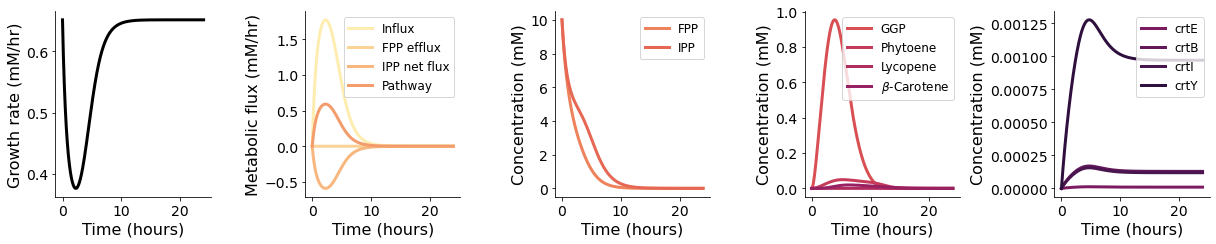

In [ ]:
###FIGURE: Sample Bcar results
palette = cmaps.matter.discrete(14).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
fig, axs = plt.subplots(1, 5, figsize=(17, 3.5))
#Growth rate 
ax = axs[0]
ax.plot(fba.time, fba.lam, lw=linewidth, color="black")
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Growth rate (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

#Fluxes
ax = axs[1]
ax.plot(fba.time, fba.v_in, lw=linewidth, color=palette[0], label=r'Influx')
ax.plot(fba.time, fba.v_fpp, lw=linewidth, color=palette[1], label=r'FPP efflux')
ax.plot(fba.time, fba.v_ipp, lw=linewidth, color=palette[2], label=r'IPP net flux')
ax.plot(ode.time, ode.v_p, lw=linewidth, color=palette[3], label=r'Pathway')

ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Metabolic flux (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize)

#Precursors
ax = axs[2]
ax.plot(ode.time, ode.fpp, lw=linewidth, color=palette[4], label='FPP')
ax.plot(ode.time, ode.ipp, lw=linewidth, color=palette[5], label='IPP')
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize)

#Pathway Metabolites
ax = axs[3]
ax.plot(ode.time, ode.ggp, lw=linewidth, color=palette[6], label='GGP')
ax.plot(ode.time, ode.phy, lw=linewidth, color=palette[7], label='Phytoene')
ax.plot(ode.time, ode.lyc, lw=linewidth, color=palette[8], label='Lycopene')
ax.plot(ode.time, ode.bcar, lw=linewidth, color=palette[9], label=r'$\beta$-Carotene')

ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize)

#Enzymes
ax = axs[4]
ax.plot(ode.time, ode.crtE, lw=linewidth, color=palette[10], label='crtE')
ax.plot(ode.time, ode.crtB, lw=linewidth, color=palette[11], label='crtB')
ax.plot(ode.time, ode.crtI, lw=linewidth, color=palette[12], label='crtI')
ax.plot(ode.time, ode.crtY, lw=linewidth, color=palette[13], label='crtY')
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
ax.legend(fontsize=legendsize, loc='upper right')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

fig.tight_layout()
#fig.savefig("../figs/bcar_samplesim.png", dpi=300)

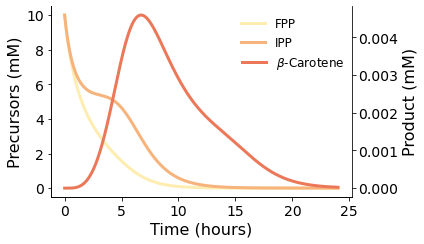

In [57]:
###FIGURE: Sample Bcar results
palette = cmaps.matter.discrete(7).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
fig, axs = plt.subplots(1, 1, figsize=(6, 3.5))
# #Growth rate 
# ax = axs[0]
# ax.plot(fba.time, fba.lam, lw=linewidth, color="black")
# ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
# ax.set_ylabel('Growth rate (mM/hr)', fontsize=axislabelsize)
# ax.tick_params(axis='y', labelsize=axistickssize)
# ax.tick_params(axis='x', labelsize=axistickssize)
# for axis in ['top','right']:
#     ax.spines[axis].set_linewidth(0)

#Precursors
ax = axs
ax.plot(ode.time, ode.fpp, lw=linewidth, color=palette[0], label='FPP')
ax.plot(ode.time, ode.ipp, lw=linewidth, color=palette[1], label='IPP')
ax2 = ax.twinx()
ax2.plot(ode.time, ode.bcar, lw=linewidth, color=palette[2], label=r'$\beta$-Carotene')
ax2.set_ylabel('Product (mM)', fontsize=axislabelsize)
for axis in ['top','right']:
    ax2.spines[axis].set_linewidth(0)
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Precursors (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize, frameon=False, bbox_to_anchor=(0.85, 1.))
ax2.legend(fontsize=legendsize, frameon=False, bbox_to_anchor=(0.6, 0.8))
ax2.tick_params(axis='y', labelsize=axistickssize)
# #Enzymes
# ax = axs[2]
# ax.plot(ode.time, ode.crtE, lw=linewidth, color=palette[3], label='crtE')
# ax.plot(ode.time, ode.crtB, lw=linewidth, color=palette[4], label='crtB')
# ax.plot(ode.time, ode.crtI, lw=linewidth, color=palette[5], label='crtI')
# ax.plot(ode.time, ode.crtY, lw=linewidth, color=palette[6], label='crtY')
# ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
# ax.set_ylabel('Enzymes (mM)', fontsize=axislabelsize)
# ax.tick_params(axis='y', labelsize=axistickssize)
# ax.tick_params(axis='x', labelsize=axistickssize)
# ax.legend(fontsize=legendsize, loc='upper right', frameon=False)
# for axis in ['top','right']:
#     ax.spines[axis].set_linewidth(0)

fig.tight_layout()
fig.savefig("../figs/bcar_samplesim_metabolites.png", dpi=300)

### Burden Experiments

In [96]:
##Read in data (burden already computed)
sum_nc = pd.read_csv('F:/burden/beta_carotene/nc/sum_data_nc_feas.csv')
sum_ur = pd.read_csv('F:/burden/beta_carotene/ur/sum_data_ur_feas.csv')
sum_op = pd.read_csv('F:/burden/beta_carotene/ur_operon/ur_operon/sum_data_ur_operon_burden.csv')
##Read in operon data (partial) and compute burden
# sum_op = pd.read_csv('F:/burden/beta_carotene/ur_operon/ur_operon/sum_data_ur_operon.csv')
# fba_op = pd.read_csv('F:/burden/beta_carotene/ur_operon/ur_operon/sim_fba_data_ur_operon.csv')
# print('read in data')
# #compute sum under lam curve
# burdens = []
# for w in fba_op.W.unique():
#     fba_data = fba_op.loc[fba_op.W == w].reset_index(drop=True)
#     burden = sum(fba_data.lam[0] - fba_data.lam)
#     burdens.append(burden)
# sum_op['burden'] = burdens
# print('N= ', len(sum_op))
# sum_op.to_csv('F:/burden/beta_carotene/ur_operon/ur_operon/sum_data_ur_operon_burden.csv')


In [59]:
# #Compute fraction that is failing and remove
# # fba_op = pd.read_csv('F:/burden/beta_carotene/ur_operon/ur_operon/sim_fba_data_ur_operon.csv')
# # counts = fba_op.groupby('W').count()['lam']
# # counts = counts.reset_index()
# # low = counts.loc[counts.lam < 85400].reset_index(drop=True)
# # low['w1'] = [float(low.W[i].replace('(', '').replace(')', '').split(',')[0]) for i in range(len(low))]
# # low['w2'] = [float(low.W[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(low))]
# # sum_op_feas = sum_op.loc[~sum_op.w2.isin(low.w2)]
# # print('Operon N = ', len(sum_op_feas))

# # fba_nc = pd.read_csv('F:/burden/beta_carotene/nc/fba_data_nc_total.csv')
# # counts = fba_nc.groupby('W').count()['lam']
# # counts = counts.reset_index()
# # low = counts.loc[counts.lam < 85400].reset_index(drop=True)
# # low['w1'] = [float(low.W[i].replace('(', '').replace(')', '').split(',')[0]) for i in range(len(low))]
# # low['w2'] = [float(low.W[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(low))]
# # sum_nc_feas = sum_nc.loc[~sum_nc.w2.isin(low.w2)]
# print('No Control N = ', len(sum_nc_feas))

# fba_ur = pd.read_csv('F:/burden/beta_carotene/ur/fba_data_ur_total.csv')
# counts = fba_ur.groupby('W').count()['lam']
# counts = counts.reset_index()
# low = counts.loc[counts.lam < 85400].reset_index(drop=True)
# low['w1'] = [float(low.W[i].replace('(', '').replace(')', '').split(',')[0]) for i in range(len(low))]
# low['w2'] = [float(low.W[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(low))]
# sum_ur_feas = sum_ur.loc[~sum_ur.w2.isin(low.w2)]
# print('Upstream Repression N = ', len(sum_ur_feas))

# sum_ur['feas'] = np.isclose(sum_ur['w2'].values[:, np.newaxis], sum_ur_feas.w2, rtol=0, atol=1E-3).any(axis=1)
# sum_nc['feas'] = np.isclose(sum_nc['w2'].values[:, np.newaxis], sum_nc_feas.w2, rtol=0, atol=1E-3).any(axis=1)
# sum_op['feas'] = np.isclose(sum_op['w2'].values[:, np.newaxis], sum_op_feas.w2, rtol=0, atol=1E-3).any(axis=1)
# sum_op.to_csv('F:/burden/beta_carotene/ur_operon/ur_operon/sum_data_ur_operon_burden.csv')
# sum_nc.to_csv('F:/burden/beta_carotene/nc/sum_data_nc_feas.csv')
# sum_ur.to_csv('F:/burden/beta_carotene/ur/sum_data_ur_feas.csv')

Operon N =  260
No Control N =  726
Upstream Repression N =  695


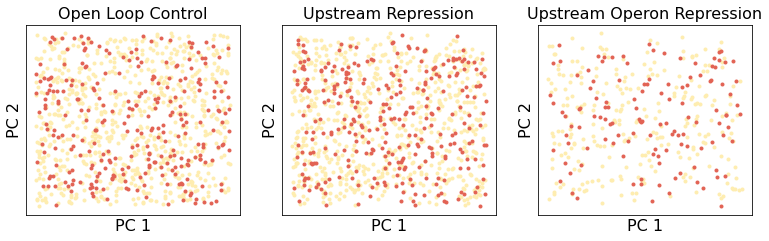

In [98]:
#FIGURE: PCA of W space with feasible samples labeled
sum_ur_infeas = sum_ur.loc[~sum_ur.w2.isin(sum_ur_feas.w2)]
sum_nc_infeas = sum_nc.loc[~sum_nc.w2.isin(sum_nc_feas.w2)]
sum_op_infeas = sum_op.loc[~sum_op.w2.isin(sum_op_feas.w2)]

pca_nc = PCA(n_components=2)
pca_nc.fit(sum_nc[['w1', 'w2', 'w3', 'w4']])
pc_nc_f = pca_nc.transform(sum_nc_feas[['w1', 'w2', 'w3', 'w4']])
pc_nc_i = pca_nc.transform(sum_nc_infeas[['w1', 'w2', 'w3', 'w4']])

pca_ur = PCA(n_components=2)
pca_ur.fit(sum_ur[['w1', 'w2', 'w3', 'w4']])
pc_ur_f = pca_ur.transform(sum_ur_feas[['w1', 'w2', 'w3', 'w4']])
pc_ur_i = pca_ur.transform(sum_ur_infeas[['w1', 'w2', 'w3', 'w4']])

pca_op = PCA(n_components=2)
pca_op.fit(sum_op[['w1', 'w2', 'w3', 'w4']])
pc_op_f = pca_op.transform(sum_op_feas[['w1', 'w2', 'w3', 'w4']])
pc_op_i = pca_op.transform(sum_op_infeas[['w1', 'w2', 'w3', 'w4']])

palette = cmaps.matter.discrete(6).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
titlesize = 16
fig, axs = plt.subplots(1, 3, figsize=(13, 3.5))
#No control
ax = axs[0]
ax.plot(pc_nc_f[:, 0], pc_nc_f[:, 1], '.', color=palette[0], label='feasible')
ax.plot(pc_nc_i[:, 0], pc_nc_i[:, 1], '.',color=palette[2], label='infeasible')
ax.set_xlabel('PC 1', fontsize=axislabelsize)
ax.set_ylabel('PC 2', fontsize=axislabelsize)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Open Loop Control', fontsize=titlesize)
#UR
ax = axs[1]
ax.plot(pc_ur_f[:, 0], pc_ur_f[:, 1],'.', color=palette[0], label='feasible')
ax.plot(pc_ur_i[:, 0], pc_ur_i[:, 1], '.',color=palette[2], label='infeasible')
ax.set_xlabel('PC 1', fontsize=axislabelsize)
ax.set_ylabel('PC 2', fontsize=axislabelsize)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Upstream Repression', fontsize=titlesize)
#Operon
ax = axs[2]
ax.plot(pc_op_f[:, 0], pc_op_f[:, 1],'.', color=palette[0], label='feasible')
ax.plot(pc_op_i[:, 0], pc_op_i[:, 1], '.', color=palette[2], label='infeasible')
ax.set_xlabel('PC 1', fontsize=axislabelsize)
ax.set_ylabel('PC 2', fontsize=axislabelsize)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Upstream Operon Repression', fontsize=titlesize)
fig.savefig('../figs/lhc_feasibility_pca.png', dpi=500)

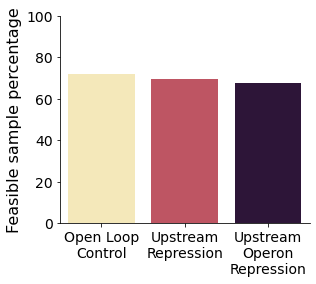

In [111]:
###Figure: Proportion of infeasible runs
prop_nc = 100*len(sum_nc_feas)/len(sum_nc)
prop_ur = 100*len(sum_ur_feas)/len(sum_ur)
prop_op = 100*len(sum_op_feas)/len(sum_op)
props = pd.DataFrame({'Feasible percentage': [prop_nc, prop_ur, prop_op], 'Architecture':['Open Loop\nControl', 'Upstream\nRepression', 'Upstream\nOperon\nRepression']})

palette = cmaps.matter.discrete(3).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
titlesize = 16
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
sns.barplot(data=props, x='Architecture', y='Feasible percentage', ax=ax, palette=palette)
ax.set_xlabel('')
ax.set_ylabel('Feasible sample percentage', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
ax.set_ylim([0, 100])
fig.tight_layout()
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
fig.savefig('../figs/feasibility_bar.png', dpi=500)

In [106]:
#Read in ODE data to get dynamics
#ode_ur = pd.read_csv('F:/burden/beta_carotene/ur/ode_data_ur_total.csv')
ode_nc = pd.read_csv('F:/burden/beta_carotene/nc/ode_data_nc_total.csv')
ode_op = pd.read_csv('F:/burden/beta_carotene/ur_operon/ur_operon/sim_ode_data_ur_operon.csv')


In [105]:
#Filter for feasibility
sum_ur_feas = sum_ur.loc[sum_ur.feas == 1].reset_index(drop=True)
print('Upstream Repression N = ', len(sum_ur_feas))

sum_nc_feas = sum_nc.loc[sum_nc.feas == 1].reset_index(drop=True)
print('No Control N = ', len(sum_nc_feas))

sum_op_feas = sum_op.loc[sum_op.feas == 1].reset_index(drop=True)
print('Operon N = ', len(sum_op_feas))

Upstream Repression N =  719
No Control N =  1005
Operon N =  264


In [107]:
#ur_Ws = ode_ur.W.unique()
nc_Ws = ode_nc.W.unique()
op_Ws = ode_op.W.unique()

#ur_w2s = [float(ur_Ws[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(ur_Ws))]
nc_w2s = [float(nc_Ws[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(nc_Ws))]
op_w2s = [float(op_Ws[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(op_Ws))]

In [108]:
##Create lookup table between W and w2:
#lookup_ur = pd.DataFrame({'W':ur_Ws, 'w2':ur_w2s})
lookup_op = pd.DataFrame({'W':op_Ws, 'w2':op_w2s})
lookup_nc = pd.DataFrame({'W':nc_Ws, 'w2':nc_w2s})

In [109]:
# med_w2_ur = sum_ur_feas.loc[sum_ur_feas.bcar_tot == sum_ur_feas.bcar_tot.median()].reset_index(drop=True).w2.item()
# med_W_ur = lookup_ur.loc[lookup_ur.w2 == med_w2_ur].W.item()
# med_ode_ur = ode_ur.loc[ode_ur.W == med_W_ur]

med_w2_nc = sum_nc_feas.loc[sum_nc_feas.bcar_tot == sum_nc_feas.bcar_tot.median()].reset_index(drop=True).w2.item()
med_W_nc = lookup_nc.loc[lookup_nc.w2 == med_w2_nc].W.item()
med_ode_nc = ode_nc.loc[ode_nc.W == med_W_nc]

med_w2_op = sum_op_feas.loc[sum_op_feas.bcar_tot == median_low(list(sum_op_feas.bcar_tot))].reset_index(drop=True).w2.item()
med_W_op = lookup_op.loc[lookup_op.w2 == med_w2_op].W.item()
med_ode_op = ode_op.loc[ode_op.W == med_W_op]

N=25

# selected_trajectories = list(lookup_ur.loc[lookup_ur.w2.isin(sum_ur_feas.w2.unique()[:N])].W)
# selected_trajectories_ode_ur = ode_ur.loc[ode_ur.W.isin(selected_trajectories)]

# selected_trajectories = list(lookup_nc.loc[lookup_nc.w2.isin(sum_nc_feas.w2.unique()[:N])].W)
# selected_trajectories_ode_nc = ode_nc.loc[ode_nc.W.isin(selected_trajectories)]

# selected_trajectories = list(lookup_op.loc[lookup_op.w2.isin(sum_op_feas.w2.unique()[:N])].W)
# selected_trajectories_ode_op = ode_op.loc[ode_op.W.isin(selected_trajectories)]

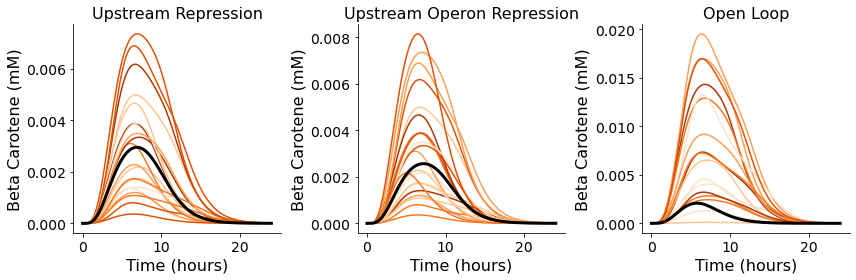

In [50]:
###FIGURE: Median product curves with confidence intervals
sns.set_palette("Oranges")

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
titlesize = 16
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

ax = axs[0]
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Beta Carotene (mM)', fontsize=axislabelsize)
for w in selected_trajectories_ode_ur.W.unique():
    ode_data = selected_trajectories_ode_ur.loc[selected_trajectories_ode_ur.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
ax.plot(med_ode_ur.time, med_ode_ur.bcar, color='black', lw=3)
ax.set_title('Upstream Repression', fontsize=titlesize)

ax = axs[1]
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Beta Carotene (mM)', fontsize=axislabelsize)
for w in selected_trajectories_ode_op.W.unique():
    ode_data = selected_trajectories_ode_op.loc[selected_trajectories_ode_op.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
ax.plot(med_ode_op.time, med_ode_op.bcar, color='black', lw=3)
ax.set_title('Upstream Operon Repression', fontsize=titlesize)

ax = axs[2]
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Beta Carotene (mM)', fontsize=axislabelsize)
for w in selected_trajectories_ode_nc.W.unique():
    ode_data = selected_trajectories_ode_nc.loc[selected_trajectories_ode_nc.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
ax.plot(med_ode_nc.time, med_ode_nc.bcar, color='black', lw=3)
ax.set_title('Open Loop', fontsize=titlesize)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

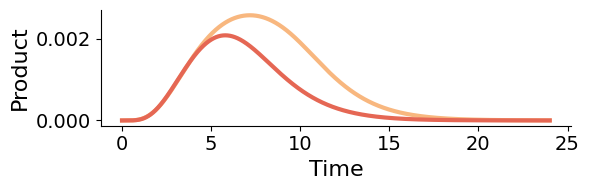

In [115]:
###FIGURE: Median product curves with confidence intervals
palette = cmaps.matter.discrete(14).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
titlesize = 16
fig, axs = plt.subplots(1, 1, figsize=(6, 2))

ax = axs
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlabel('Time', fontsize=axislabelsize)
ax.set_ylabel('Product', fontsize=axislabelsize)
# for w in selected_trajectories_ode_op.W.unique():
#     ode_data = selected_trajectories_ode_op.loc[selected_trajectories_ode_op.W == w]
#     ax.plot(ode_data.time, ode_data.bcar, color=palette[4], alpha=0.5)
ax.plot(med_ode_op.time, med_ode_op.bcar, color=palette[2], lw=3, label='Upstream\nRepression')

# for w in selected_trajectories_ode_nc.W.unique():
#     ode_data = selected_trajectories_ode_nc.loc[selected_trajectories_ode_nc.W == w]
#     ax.plot(ode_data.time, ode_data.bcar, color=palette[8], alpha=0.5)
ax.plot(med_ode_nc.time, med_ode_nc.bcar, color=palette[5], lw=3, label='Open Loop')
#ax.legend(fontsize=legendsize)
fig.tight_layout()
#if save_figs: 
fig.savefig('../figs/bcar_product_curve.png', dpi=500)

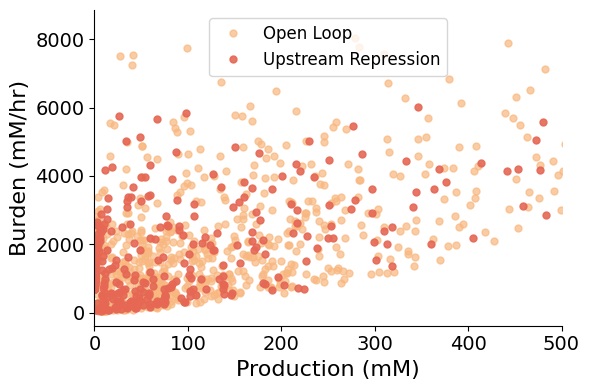

In [101]:
###FIGURE: Burden vs. production
palette = cmaps.matter.discrete(14).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
titlesize = 16

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=axislabelsize)
ax.set_ylabel('Burden (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
ax.plot(sum_nc.bcar_tot, sum_nc.burden, '.', c=palette[2], ms=10, alpha=0.7, label='Open Loop')
#ax.plot(sum_ur_feas.bcar_tot, sum_ur_feas.burden, '.', c='black', ms=10, alpha=0.5)
ax.plot(sum_op.bcar_tot, sum_op.burden, '.', c=palette[5], ms=10, alpha=0.9, label='Upstream Repression')
ax.legend(fontsize=legendsize)
fig.tight_layout()
fig.savefig('../figs/bcar_burden_scatter.png', dpi=500)

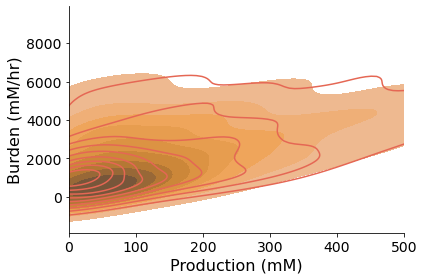

In [19]:
###KDE plot of scatter

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=axislabelsize)
ax.set_ylabel('Burden (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
sns.kdeplot(data=sum_op_feas, x='bcar_tot', y='burden', ax=ax, color = palette[2], fill=True, legend=False)
sns.kdeplot(data=sum_nc_feas, x='bcar_tot', y='burden', ax=ax, color = palette[5], fill=False, legend=False)

fig.tight_layout()

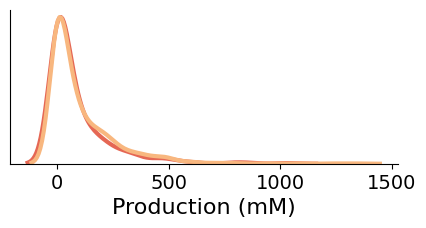

In [104]:
#Histogram of production
fig, axs = plt.subplots(1, 1, figsize=(5, 2))
palette = cmaps.matter.discrete(14).colors
#Production histograms
ax = axs
sns.kdeplot(data=sum_op, x='bcar_tot', ax=ax, color = palette[5], linewidth=3, legend=False)

sns.kdeplot(data=sum_nc, x='bcar_tot', ax=ax, color = palette[2], linewidth=3, legend=False)

ax.set_xlabel('Production (mM)', fontsize=axislabelsize)
ax.set_ylabel('')
ax.set_yticks([])
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
fig.savefig('../figs/bcar_burden_histogram.png', dpi=500)

### Knockouts

In [55]:
sum_knockouts = pd.DataFrame()
for f in os.listdir('F:/knockouts/'):
    if len(os.listdir('F:/knockouts/'+f)) != 0:
        sum_k = pd.read_csv('F:/knockouts/'+f+'/sum_data_'+f+'.csv')
        sum_k['k'] = f
        sum_knockouts = pd.concat([sum_knockouts, sum_k])
print("N = ", len(sum_knockouts))

N =  487


c:\Users\Charlotte\anaconda3\envs\sundials\lib\site-packages\colormaps\colormap.py:47: UserWarning: Warning: Number of levels requested is more than the number of colors. Deafulting to maximum number of colors.
  warnings.warn(


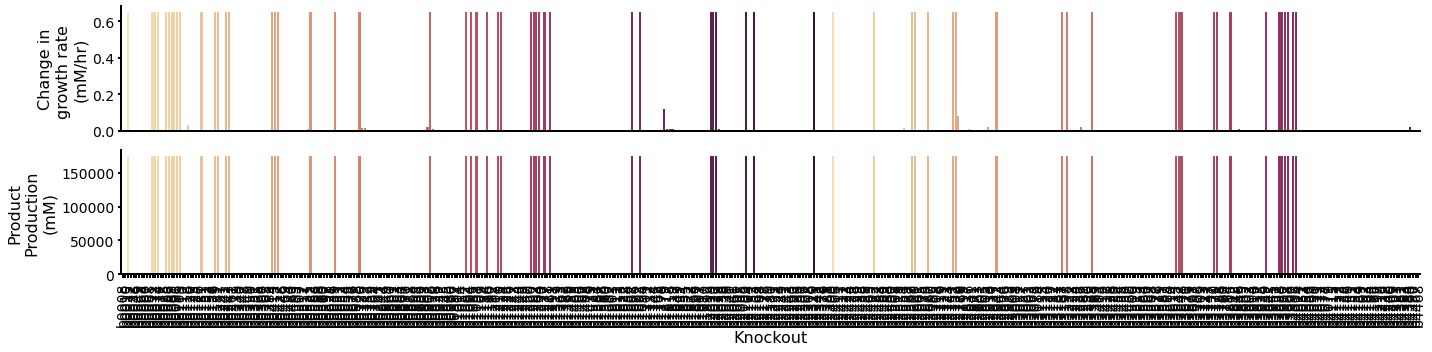

In [4]:
###FIGURE: Bar plot of production
palette = cmaps.matter.discrete(len(sum_knockouts)).colors
linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12

fig, axs = plt.subplots(2, 1,figsize=(20, 5), sharex=True)

#Growth rates
ax = axs[0]
sns.barplot(data=sum_knockouts, x='k', y='delta_lam', palette=palette, ax=ax)
# ax.set_ylabel('Steady-state\ngrowth rate \n(mM/hr)', fontsize=axislabelsize)
ax.set_ylabel('Change in\ngrowth rate \n(mM/hr)', fontsize=axislabelsize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False)

#Product production
ax = axs[1]
sns.barplot(data=sum_knockouts, x='k', y='bcar_tot', palette=palette, ax=ax)
ax.set_ylabel('Product\nProduction\n(mM)', fontsize=axislabelsize)
ax.set_xlabel('Knockout', fontsize=16)
ax.set_xticklabels(sum_knockouts.k.unique(), fontsize=8, rotation=90)

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
fig.tight_layout()

,index,w1,w2,w3,w4,final_lam,delta_lam,w_tot,bcar_tot,objmin,k
0,0,2.411031e-07,0.000097,0.000098,0.000367,-2.585378e-13,0.650000,0.000562,174543.603793,0.050008,b3972
1,1,2.411031e-07,0.000097,0.000098,0.000367,-2.505599e-14,0.650000,0.000562,174543.603793,0.050008,b2472
2,2,2.411031e-07,0.000097,0.000098,0.000367,-1.280305e-14,0.650000,0.000562,174543.603793,0.050008,b0086
3,3,2.411031e-07,0.000097,0.000098,0.000367,-5.642086e-15,0.650000,0.000562,174543.603793,0.050008,b1094
4,4,2.411031e-07,0.000097,0.000098,0.000367,-2.967568e-15,0.650000,0.000562,174543.603793,0.050008,b2600
...,...,...,...,...,...,...,...,...,...,...,...
482,482,2.411031e-07,0.000097,0.000098,0.000367,6.512965e-01,0.005601,0.000562,41.077711,0.050008,b0063
483,483,2.411031e-07,0.000097,0.000098,0.000367,6.512965e-01,0.005601,0.000562,41.077710,0.050008,b3073
484,484,2.411031e-07,0.000097,0.000098,0.000367,6.512965e-01,0.005601,0.000562,41.077710,0.050008,b2223
485,485,2.411031e-07,0.000097,0.000098,0.000367,6.512965e-01,0.005601,0.000562,41.077710,0.050008,b2587


c:\Users\Charlotte\anaconda3\envs\cobra\lib\site-packages\colormaps\colormap.py:47: UserWarning: Warning: Number of levels requested is more than the number of colors. Deafulting to maximum number of colors.
  warnings.warn(
C:\Users\Charlotte\AppData\Local\Temp\ipykernel_2476\1141097819.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=sorted, x='index', y='final_lam', palette=palette, ax=ax)


Text(0.5, 0, 'Knockouts')

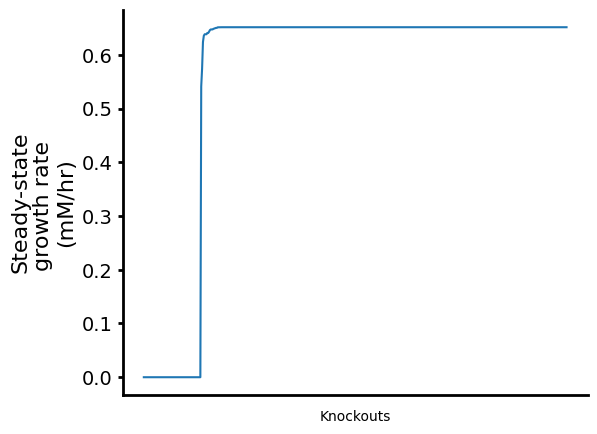

In [66]:
##Plot ranked knockout curve
sorted = sum_knockouts.sort_values(by='delta_lam')
fig, ax = plt.subplots(1, 1,figsize=(20, 5), sharex=True)

sns.barplot(data=sorted, x='k', y='delta_lam', palette=palette, ax=ax)
# ax.set_ylabel('Steady-state\ngrowth rate \n(mM/hr)', fontsize=axislabelsize)
ax.set_ylabel('Change in\ngrowth rate \n(mM/hr)', fontsize=axislabelsize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', bottom=False)
ax.set_xticklabels('')
ax.set_xlabel('Knockouts')


In [19]:
#select weird knockouts:
s = sorted.loc[sorted.final_lam > 0.1]
s.loc[s.delta_lam > 0.01]


,w1,w2,w3,w4,final_lam,delta_lam,w_tot,bcar_tot,objmin,k
0,2.411031e-07,0.000097,0.000098,0.000367,0.645932,0.010966,0.000562,42.821702,0.050008,b2836
0,2.411031e-07,0.000097,0.000098,0.000367,0.642860,0.014039,0.000562,43.858826,0.050008,b2551
0,2.411031e-07,0.000097,0.000098,0.000367,0.640572,0.016475,0.000562,44.675218,0.050008,b0727
0,2.411031e-07,0.000097,0.000098,0.000367,0.640572,0.016475,0.000562,44.675218,0.050008,b0726
0,2.411031e-07,0.000097,0.000098,0.000367,0.638221,0.018678,0.000562,45.479521,0.050008,b4388
0,2.411031e-07,0.000097,0.000098,0.000367,0.638221,0.018678,0.000562,45.479521,0.050008,b2913
0,2.411031e-07,0.000097,0.000098,0.000367,0.638220,0.018679,0.000562,45.479848,0.050008,b0907
0,2.411031e-07,0.000097,0.000098,0.000367,0.635506,0.021505,0.000562,46.480172,0.050008,b3236
0,2.411031e-07,0.000097,0.000098,0.000367,0.623798,0.033187,0.000562,50.991788,0.050008,b0116
0,2.411031e-07,0.000097,0.000098,0.000367,0.574262,0.083424,0.000562,76.831544,0.050008,b2779


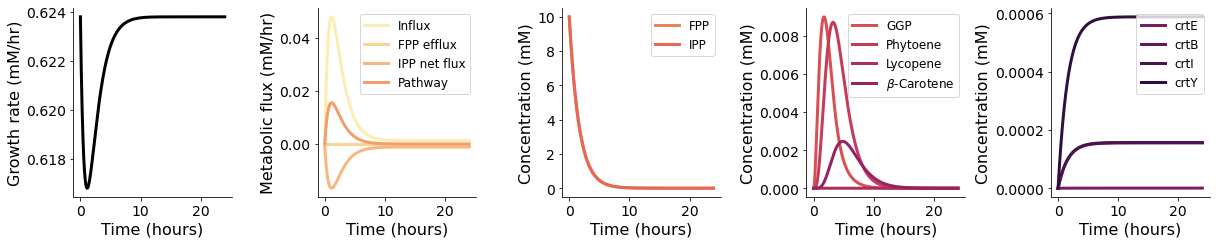

In [22]:
#FIGURE - Single knockout dynamics:
f = 'b0116'

sum_k = pd.read_csv('F:/knockouts/'+f+'/sum_data_'+f+'.csv')
fba = pd.read_csv('F:/knockouts/'+f+'/sim_fba_data_'+f+'.csv')
ode = pd.read_csv('F:/knockouts/'+f+'/sim_ode_data_'+f+'.csv')

###FIGURE: Sample Bcar results
palette = cmaps.matter.discrete(14).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
fig, axs = plt.subplots(1, 5, figsize=(17, 3.5))
#Growth rate 
ax = axs[0]
ax.plot(fba.time, fba.lam, lw=linewidth, color="black")
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Growth rate (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

#Fluxes
ax = axs[1]
ax.plot(fba.time, fba.v_in, lw=linewidth, color=palette[0], label=r'Influx')
ax.plot(fba.time, fba.v_fpp, lw=linewidth, color=palette[1], label=r'FPP efflux')
ax.plot(fba.time, fba.v_ipp, lw=linewidth, color=palette[2], label=r'IPP net flux')
ax.plot(ode.time, ode.v_p, lw=linewidth, color=palette[3], label=r'Pathway')

ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Metabolic flux (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize)

#Precursors
ax = axs[2]
ax.plot(ode.time, ode.fpp, lw=linewidth, color=palette[4], label='FPP')
ax.plot(ode.time, ode.ipp, lw=linewidth, color=palette[5], label='IPP')
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize)

#Pathway Metabolites
ax = axs[3]
ax.plot(ode.time, ode.ggp, lw=linewidth, color=palette[6], label='GGP')
ax.plot(ode.time, ode.phy, lw=linewidth, color=palette[7], label='Phytoene')
ax.plot(ode.time, ode.lyc, lw=linewidth, color=palette[8], label='Lycopene')
ax.plot(ode.time, ode.bcar, lw=linewidth, color=palette[9], label=r'$\beta$-Carotene')

ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize)

#Enzymes
ax = axs[4]
ax.plot(ode.time, ode.crtE, lw=linewidth, color=palette[10], label='crtE')
ax.plot(ode.time, ode.crtB, lw=linewidth, color=palette[11], label='crtB')
ax.plot(ode.time, ode.crtI, lw=linewidth, color=palette[12], label='crtI')
ax.plot(ode.time, ode.crtY, lw=linewidth, color=palette[13], label='crtY')
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
ax.legend(fontsize=legendsize, loc='upper right')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

fig.tight_layout()
#fig.savefig("../figs/bcar_samplesim.png", dpi=300)


#### Single knockout run with FBA only

In [78]:
from cobra.flux_analysis import single_gene_deletion
from cobra.io import read_sbml_model
iml1515 = read_sbml_model('../models/iML1515.xml')
iml1515.reactions.EX_glc__D_e.lower_bound = 0.0
iml1515.reactions.EX_fru_e.lower_bound = -7.5  #--> results in 0.65 growth rate
deletion_results = single_gene_deletion(iml1515)

deletion_results['k'] = [str(deletion_results.ids[i]).strip('{\'}') for i in range(len(deletion_results))]
deletion_results['diff'] = [0.65-deletion_results.growth[i] for i in range(len(deletion_results))]

In [79]:
combo = pd.merge(deletion_results, sorted, on='k')
combo = combo.sort_values(by='delta_lam')

In [89]:
deletion_results = deletion_results.sort_values(by='growth').reset_index(drop=True).reset_index()

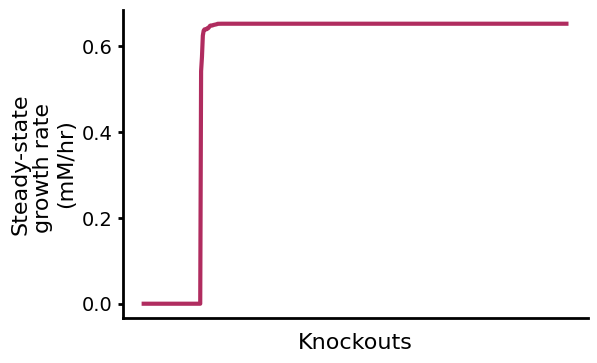

In [118]:
##Plot ranked knockout curve
palette = cmaps.matter.discrete(14).colors
sorted = sum_knockouts.sort_values(by='final_lam')
sorted = sorted.reset_index(drop=True).reset_index()
fig, ax = plt.subplots(1, 1,figsize=(6, 4), sharex=True)

#sns.barplot(data=sorted, x='k', y='final_lam', palette=palette, ax=ax)
sns.lineplot(data=combo, x='index', y='final_lam', color=palette[8], ax=ax, lw=3)
#sns.lineplot(data=deletion_results, x='index', y='growth', palette=palette, ax=ax,)

ax.set_ylabel('Steady-state\ngrowth rate \n(mM/hr)', fontsize=axislabelsize)
#ax.set_ylabel('Change in\ngrowth rate \n(mM/hr)', fontsize=axislabelsize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', bottom=False)
ax.set_xticklabels('')
ax.set_xlabel('Knockouts', fontsize=axislabelsize)
fig.savefig('../figs/bcar_knockouts_sigmoid.png', dpi=500)

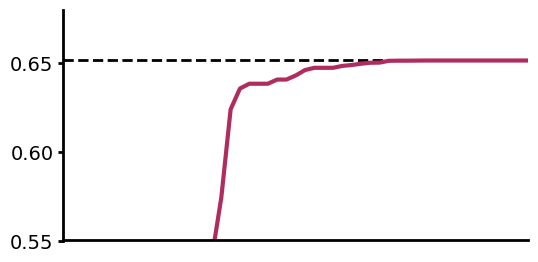

In [127]:
## No labels zoom in on interesting region
##Plot ranked knockout curve
palette = cmaps.matter.discrete(14).colors
fig, ax = plt.subplots(1, 1,figsize=(6, 3), sharex=True)
ax.hlines(0.6513, 50, 100, color='k', linestyles='dashed', lw=2)

sns.lineplot(data=combo, x='index', y='final_lam', color=palette[8], ax=ax, lw=3)

ax.set_ylabel('')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', bottom=False)
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_ylim([0.55, 0.68])
ax.set_xlim([50, 100])
fig.savefig('../figs/bcar_knockouts_sigmoid_zoom.png', dpi=500)

In [134]:
#select weird knockouts:
s = sorted.loc[sorted.final_lam > 0.1]
s = s.loc[s.delta_lam > 0.01]
weird_ks = s.k.unique()

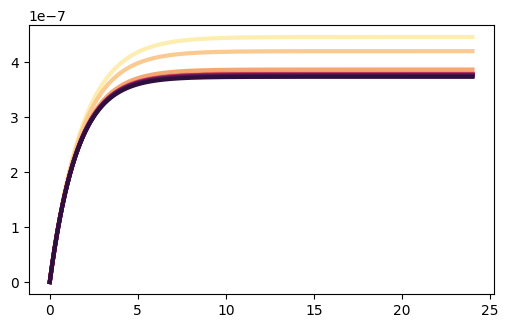

In [141]:
### Timescale comparison of knockouts to show dynamics

palette = cmaps.matter.discrete(11).colors
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
i=-1
for f in weird_ks:
    i = i+1
    sum_k = pd.read_csv('F:/knockouts/'+f+'/sum_data_'+f+'.csv')
    fba = pd.read_csv('F:/knockouts/'+f+'/sim_fba_data_'+f+'.csv')
    ode = pd.read_csv('F:/knockouts/'+f+'/sim_ode_data_'+f+'.csv')
    ax.plot(ode.time, ode.crtE, lw=linewidth, color=palette[i], label='crtY')

### Exploratory Analysis

In [3]:
fba_data_total = pd.read_csv("exp_data/sim_fba_data_1.csv")
ode_data_total = pd.read_csv("exp_data/sim_ode_data_1.csv")
sum_data_total = pd.read_csv("exp_data/sum_data_1.csv")

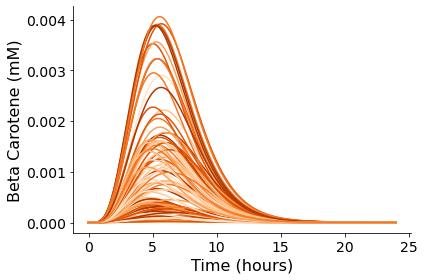

In [18]:
###FIGURE: Product curve visualization
sns.set_palette("Oranges")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Beta Carotene (mM)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in ode_data_total.W.unique():
    ode_data = ode_data_total.loc[ode_data_total.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

Text(0.5, 1.0, 'FPP')

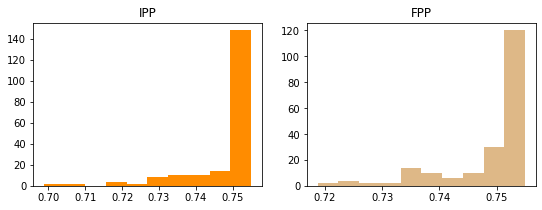

In [64]:
fig, ax = plt.subplots(1, 2,figsize=(9, 3))
ax[0].hist(list(ode_data_total.loc[ode_data_total.time == 0].ipp), color='darkorange')
ax[0].set_title('IPP')
ax[1].hist(list(ode_data_total.loc[ode_data_total.time == 0].fpp), color='burlywood')
ax[1].set_title('FPP')

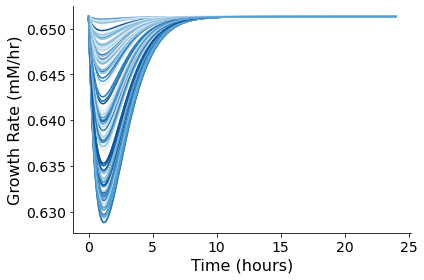

In [27]:
###FIGURE: Growth rate curve visualization
sns.set_palette("Blues")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Growth Rate (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in fba_data_total.W.unique():
    fba_data = fba_data_total.loc[fba_data_total.W == w]
    ax.plot(fba_data.time, fba_data.lam)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

In [29]:
#compute sum under lam curve
burdens = []
for w in fba_data_total.W.unique():
    fba_data = fba_data_total.loc[fba_data_total.W == w].reset_index(drop=True)
    burden = sum(fba_data.lam[0] - fba_data.lam)
    burdens.append(burden)

Coefficient of determination:  0.30023180362011503


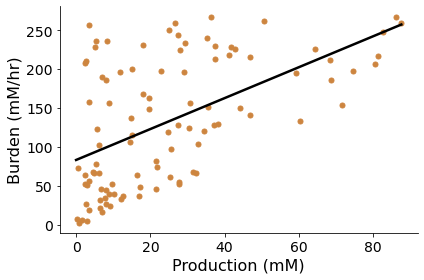

In [70]:
###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_total.bcar_tot, burdens, '.', c='peru', ms=10)
#Plot linear regression line
b, a = np.polyfit(sum_data_total.bcar_tot, burdens, deg=1)
xseq = np.linspace(0, max(sum_data_total.bcar_tot), num=100)
ax.plot(xseq, a + b * xseq, c='black', lw=2.5)
coefficient_of_dermination = r2_score(burdens, a + b * sum_data_total.bcar_tot)
print('Coefficient of determination: ', coefficient_of_dermination)
fig.tight_layout()


In [75]:
ode_data_highic = pd.read_csv("exp_data/sim_ode_data_highic.csv")
sum_data_highic = pd.read_csv("exp_data/sum_data_highic.csv")
fba_data_highic = pd.read_csv("exp_data/sim_fba_data_highic.csv")

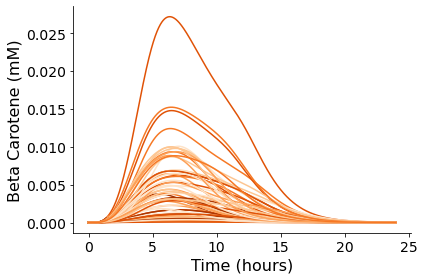

In [76]:
###FIGURE: Product curve visualization
sns.set_palette("Oranges")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Beta Carotene (mM)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in ode_data_highic.W.unique():
    ode_data = ode_data_highic.loc[ode_data_highic.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

Coefficient of determination:  0.34307531231821486


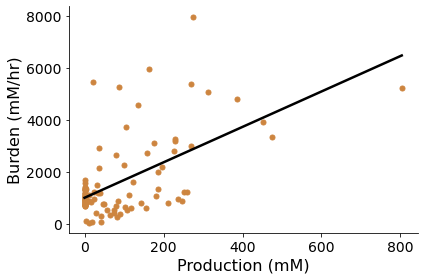

In [77]:
#compute sum under lam curve
burdens = []
for w in fba_data_highic.W.unique():
    fba_data = fba_data_highic.loc[fba_data_highic.W == w].reset_index(drop=True)
    burden = sum(fba_data.lam[0] - fba_data.lam)
    burdens.append(burden)

###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_highic.bcar_tot, burdens, '.', c='peru', ms=10)
#Plot linear regression line
b, a = np.polyfit(sum_data_highic.bcar_tot, burdens, deg=1)
xseq = np.linspace(0, max(sum_data_highic.bcar_tot), num=100)
ax.plot(xseq, a + b * xseq, c='black', lw=2.5)
coefficient_of_dermination = r2_score(burdens, a + b * sum_data_highic.bcar_tot)
print('Coefficient of determination: ', coefficient_of_dermination)
fig.tight_layout()


Coefficient of determination:  0.04721343062595729


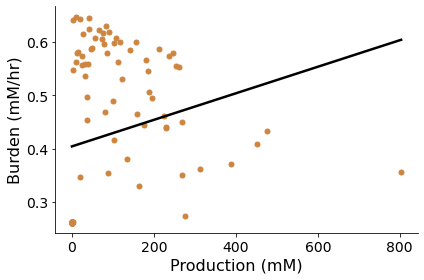

In [78]:
#compute sum under lam curve
burdens = []
for w in fba_data_highic.W.unique():
    fba_data = fba_data_highic.loc[fba_data_highic.W == w].reset_index(drop=True)
    burden = min(fba_data.lam)
    burdens.append(burden)




Coefficient of determination:  0.21728651735889604


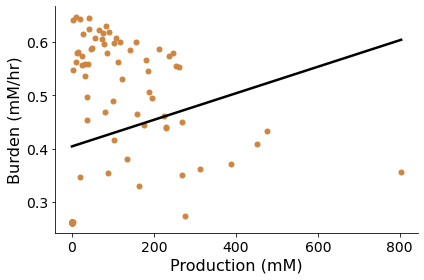

In [88]:
###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_highic.bcar_tot, burdens, '.', c='peru', ms=10)
#Plot linear regression line
slope, intercept, r_value, p_value, std_err = linregress(sum_data_highic.bcar_tot, burdens)

xseq = np.linspace(0, max(sum_data_highic.bcar_tot), num=100)
ax.plot(xseq, intercept + slope * xseq, c='black', lw=2.5)

print('Coefficient of determination: ', r_value)
fig.tight_layout()

In [3]:
###Long BayesOpt results
fba_data_total = pd.read_csv("exp_data/long_bo/sim_fba_data_long_bo.csv")
ode_data_total = pd.read_csv("exp_data/long_bo/sim_ode_data_long_bo.csv")
sum_data_total = pd.read_csv("exp_data/long_bo/sum_data_long_bo.csv")

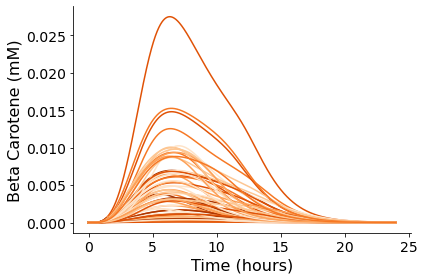

In [4]:
###FIGURE: Product curve visualization
sns.set_palette("Oranges")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Beta Carotene (mM)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in ode_data_total.W.unique():
    ode_data = ode_data_total.loc[ode_data_total.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

In [16]:
#compute sum under lam curve
burdens = []
for w in fba_data_total.W.unique():
    fba_data = fba_data_total.loc[fba_data_total.W == w].reset_index(drop=True)
    burden = sum(fba_data.lam[0] - fba_data.lam)
    burdens.append(burden)
sum_data_total['burden'] = burdens

Coefficient of determination:  0.5881923676811542


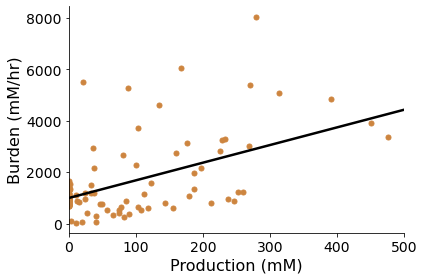

In [25]:
###FIGURE: Burden vs. production
#Remove no-production samples
data = sum_data_total
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
ax.plot(data.bcar_tot, data.burden, '.', c='peru', ms=10)
#Plot linear regression line
# b, a = np.polyfit(sum_data_total.bcar_tot, burdens, deg=1)
# xseq = np.linspace(0, max(sum_data_total.bcar_tot), num=100)
# ax.plot(xseq, a + b * xseq, c='black', lw=2.5)
# coefficient_of_dermination = r2_score(burdens, a + b * sum_data_total.bcar_tot)
# print('Coefficient of determination: ', coefficient_of_dermination)

#Plot linear regression line
slope, intercept, r_value, p_value, std_err = linregress(data.bcar_tot, data.burden)

xseq = np.linspace(0, max(data.bcar_tot), num=100)
ax.plot(xseq, intercept + slope * xseq, c='black', lw=2.5)

print('Pearson coefficient: ', r_value)
fig.tight_layout()


In [3]:
##N=1000 experiment analysis
sum_data_total = pd.DataFrame()
fba_data_total = pd.DataFrame()
ode_data_total = pd.DataFrame()

for n in range(9):
    sum_data = pd.read_csv("exp_data/long_bo_"+str((n+1))+"/sum_data_long_bo_"+str((n+1))+".csv")
    fba_data = pd.read_csv("exp_data/long_bo_"+str((n+1))+"/sim_fba_data_long_bo_"+str((n+1))+".csv")
    ode_data = pd.read_csv("exp_data/long_bo_"+str((n+1))+"/sim_ode_data_long_bo_"+str((n+1))+".csv")
    sum_data_total = pd.concat([sum_data_total, sum_data])
    fba_data_total = pd.concat([fba_data_total, fba_data])
    ode_data_total = pd.concat([ode_data_total, ode_data])

sum_data = pd.read_csv("exp_data/long_bo/sum_data_long_bo.csv")
fba_data = pd.read_csv("exp_data/long_bo/sim_fba_data_long_bo.csv")
ode_data = pd.read_csv("exp_data/long_bo/sim_ode_data_long_bo.csv")
sum_data_total = pd.concat([sum_data_total, sum_data])
fba_data_total = pd.concat([fba_data_total, fba_data])
ode_data_total = pd.concat([ode_data_total, ode_data])

#Read additional files N=285
sum_data = pd.read_csv("exp_data/long_bo_extra/sum_data_long_bo_extra.csv")
fba_data = pd.read_csv("exp_data/long_bo_extra/sim_fba_data_long_bo_extra.csv")
ode_data = pd.read_csv("exp_data/long_bo_extra/sim_ode_data_long_bo_extra.csv")
sum_data_total = pd.concat([sum_data_total, sum_data])
fba_data_total = pd.concat([fba_data_total, fba_data])
ode_data_total = pd.concat([ode_data_total, ode_data])

##Sanity check
len(ode_data_total.W.unique())

# #compute sum under lam curve
# burdens = []
# for w in fba_data.W.unique():
#     data = fba_data.loc[fba_data.W == w].reset_index(drop=True)
#     burden = sum(data.lam[0] - data.lam)
#     burdens.append(burden)
# sum_data['burden'] = burdens

# #Append to other csv and save out
# sum_data_total = pd.concat([sum_data_total, sum_data])
# sum_data_total.to_csv('exp_data/sum_data_long_bo_total.csv')

# #compute sum under lam curve
# burdens = []
# for w in fba_data_total.W.unique():
#     fba_data = fba_data_total.loc[fba_data_total.W == w].reset_index(drop=True)
#     burden = sum(fba_data.lam[0] - fba_data.lam)
#     burdens.append(burden)
# sum_data_total['burden'] = burdens
# sum_data_total.to_csv('exp_data/sum_data_long_bo_total.csv')

1005

In [5]:
#fba_data_total.to_csv('exp_data/burden/nc/fba_data_nc_total.csv')
ode_data_total.to_csv('exp_data/burden/nc/ode_data_nc_total.csv')
#sum_data_total.to_csv('exp_data/burden/nc/sum_data_nc_total.csv')

Pearson coefficient:  0.6399201125977304
R squared:  0.409497750507092


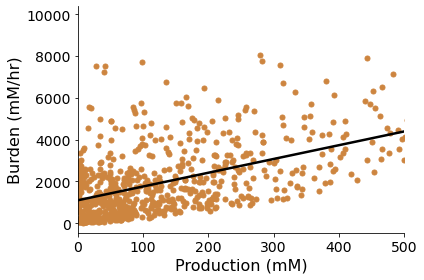

In [5]:
###FIGURE: Burden vs. production
#Remove no-production samples
data = pd.read_csv('exp_data/sum_data_long_bo_total.csv')
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
ax.plot(data.bcar_tot, data.burden, '.', c='peru', ms=10)

#Plot linear regression line
slope, intercept, r_value, p_value, std_err = linregress(data.bcar_tot, data.burden)

xseq = np.linspace(0, max(data.bcar_tot), num=100)
ax.plot(xseq, intercept + slope * xseq, c='black', lw=2.5)

print('Pearson coefficient: ', r_value)
print('R squared: ', r_value**2)
fig.tight_layout()


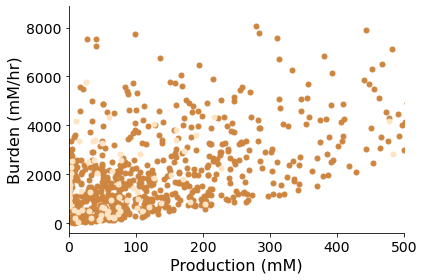

In [9]:
sum_data_ur = pd.read_csv("exp_data/ur_100/sum_data_ur_100.csv")
fba_data_ur = pd.read_csv("exp_data/ur_100/sim_fba_data_ur_100.csv")
ode_data_ur = pd.read_csv("exp_data/ur_100/sim_ode_data_ur_100.csv")

#compute sum under lam curve
burdens = []
for w in fba_data_ur.W.unique():
    data = fba_data_ur.loc[fba_data_ur.W == w].reset_index(drop=True)
    burden = sum(data.lam[0] - data.lam)
    burdens.append(burden)
sum_data_ur['burden'] = burdens

###FIGURE: Burden vs. production
data = pd.read_csv('exp_data/sum_data_long_bo_total.csv')
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
ax.plot(data.bcar_tot, data.burden, '.', c='peru', ms=10)
ax.plot(sum_data_ur.bcar_tot, sum_data_ur.burden, '.', c='black', ms=10)
fig.tight_layout()

In [6]:
###FINAL DATA READ IN AND CLEAN UP
fba_data_ur_1000 = pd.read_csv("exp_data/ur_1000/sim_fba_data_ur_1000.csv")
ode_data_ur_1000 = pd.read_csv("exp_data/ur_1000/sim_ode_data_ur_1000.csv")

fba_data_ur_100 = pd.read_csv("exp_data/ur_100/sim_fba_data_ur_100.csv")
ode_data_ur_100 = pd.read_csv("exp_data/ur_100/sim_ode_data_ur_100.csv")

fba_data_ur = pd.concat([fba_data_ur_100, fba_data_ur_1000])
ode_data_ur = pd.concat([ode_data_ur_100, ode_data_ur_1000])

fba_data_ur.to_csv('exp_data/burden/ur/fba_data_ur_total.csv')
ode_data_ur.to_csv('exp_data/burden/ur/ode_data_ur_total.csv')

In [12]:
###N=1000 UR experiment
sum_data_ur_1000 = pd.read_csv("exp_data/ur_1000/sum_data_ur_1000.csv")
fba_data_ur_1000 = pd.read_csv("exp_data/ur_1000/sim_fba_data_ur_1000.csv")
#ode_data_ur_1000 = pd.read_csv("exp_data/ur_1000/sim_ode_data_ur_1000.csv")

#compute sum under lam curve
burdens = []

for w in fba_data_ur_1000.W.unique():
    data = fba_data_ur_1000.loc[fba_data_ur_1000.W == w].reset_index(drop=True)
    burden = sum(data.lam[0] - data.lam)
    burdens.append(burden)
sum_data_ur_1000['burden'] = burdens
sum_data_ur = pd.concat([sum_data_ur, sum_data_ur_1000])
sum_data_ur.to_csv('exp_data/ur_1000/sum_data_ur_1000_complete.csv')

TypeError: 'function' object is not subscriptable

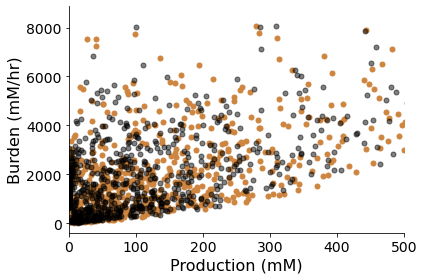

In [17]:
###FIGURE: Burden vs. production
data = pd.read_csv('exp_data/sum_data_long_bo_total.csv')
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
ax.plot(data.bcar_tot, data.burden, '.', c='peru', ms=10)
ax.plot(sum_data_ur.bcar_tot, sum_data_ur.burden, '.', c='black', ms=10, alpha=0.5)
fig.tight_layout()

(array([327., 308., 133.,  93.,  56.,  36.,  26.,   9.,   7.,   5.]),
 array([  33.31458904,  857.09506525, 1680.87554145, 2504.65601765,
        3328.43649385, 4152.21697005, 4975.99744625, 5799.77792245,
        6623.55839865, 7447.33887485, 8271.11935106]),
 <BarContainer object of 10 artists>)

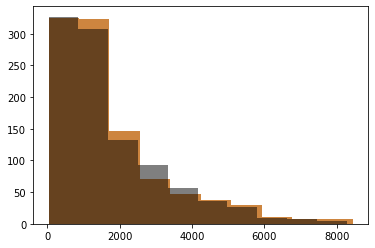

In [22]:
plt.hist(data.burden, color='peru')
plt.hist(sum_data_ur.burden, color='black', alpha=0.5)

C:\Users\CHARLO~1\AppData\Local\Temp/ipykernel_24396/76912762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["obj"] = data.burden/data.bcar_tot


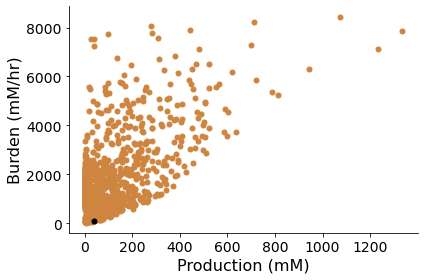

In [101]:
#Tradeoffs for design function
a1 = 1.
a2 = 1E3
#data["obj"] = a1*data.burden + a2*(1/data.bcar_tot)
data["obj"] = data.burden/data.bcar_tot
d = data.loc[data.obj == min(data.obj)]

###FIGURE: Burden vs. production
data = sum_data_total
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.plot(data.bcar_tot, data.burden, '.', c='peru', ms=10)
ax.plot(d.bcar_tot, d.burden, '.', c='black', ms=10)
fig.tight_layout()

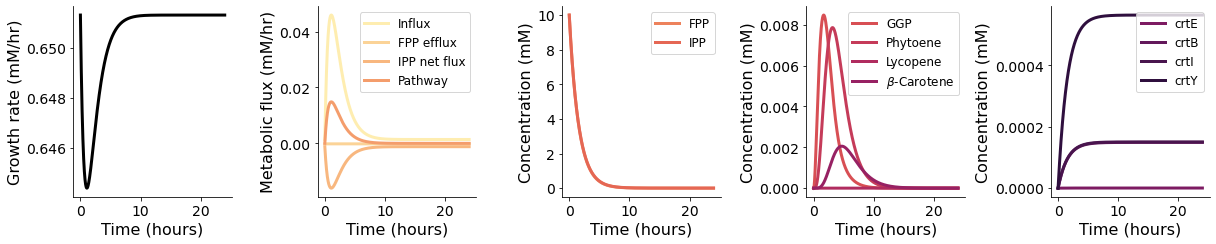

In [5]:
##KNOCKOUTS
knockouts = os.listdir('F:/knockouts/')

fba = pd.read_csv('F:/knockouts/'+knockouts[0]+'/sim_fba_data_'+knockouts[0]+'.csv')
ode = pd.read_csv('F:/knockouts/'+knockouts[0]+'/sim_ode_data_'+knockouts[0]+'.csv')

###FIGURE: Sample Bcar results
palette = cmaps.matter.discrete(14).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
fig, axs = plt.subplots(1, 5, figsize=(17, 3.5))
#Growth rate 
ax = axs[0]
ax.plot(fba.time, fba.lam, lw=linewidth, color="black")
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Growth rate (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

#Fluxes
ax = axs[1]
ax.plot(fba.time, fba.v_in, lw=linewidth, color=palette[0], label=r'Influx')
ax.plot(fba.time, fba.v_fpp, lw=linewidth, color=palette[1], label=r'FPP efflux')
ax.plot(fba.time, fba.v_ipp, lw=linewidth, color=palette[2], label=r'IPP net flux')
ax.plot(ode.time, ode.v_p, lw=linewidth, color=palette[3], label=r'Pathway')

ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Metabolic flux (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize)

#Precursors
ax = axs[2]
ax.plot(ode.time, ode.fpp, lw=linewidth, color=palette[4], label='FPP')
ax.plot(ode.time, ode.ipp, lw=linewidth, color=palette[5], label='IPP')
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize)

#Pathway Metabolites
ax = axs[3]
ax.plot(ode.time, ode.ggp, lw=linewidth, color=palette[6], label='GGP')
ax.plot(ode.time, ode.phy, lw=linewidth, color=palette[7], label='Phytoene')
ax.plot(ode.time, ode.lyc, lw=linewidth, color=palette[8], label='Lycopene')
ax.plot(ode.time, ode.bcar, lw=linewidth, color=palette[9], label=r'$\beta$-Carotene')

ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize)

#Enzymes
ax = axs[4]
ax.plot(ode.time, ode.crtE, lw=linewidth, color=palette[10], label='crtE')
ax.plot(ode.time, ode.crtB, lw=linewidth, color=palette[11], label='crtB')
ax.plot(ode.time, ode.crtI, lw=linewidth, color=palette[12], label='crtI')
ax.plot(ode.time, ode.crtY, lw=linewidth, color=palette[13], label='crtY')
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
ax.legend(fontsize=legendsize, loc='upper right')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

fig.tight_layout()
fig.savefig("../figs/fig1d.png", dpi=300)